# Regresión básica / Ejercicio de Regresión 1 (Core)

Descripción
Ejercicio de Regresión 1 (Core)



Objetivo

- Aplicar los conceptos de regresión lineal para resolver un problema práctico utilizando Python.

Descripción del problema: 

Supongamos que trabajas en una empresa que desea predecir el precio de venta de casas en función de varias características. Tienes un conjunto de datos con información sobre las casas, incluyendo el tamaño de la casa (en pies cuadrados), el número de habitaciones, el número de baños y la antigüedad de la casa (en años). Tu tarea es construir un modelo de regresión lineal que pueda predecir el precio de venta de una casa dada.

Instrucciones:

1. Carga de datos: Descarga el archivo de datos house_prices.csv que contiene las siguientes columnas:
- SqFt: Tamaño de la casa en pies cuadrados.
- Bedrooms: Número de habitaciones.
- Bathrooms: Número de baños.
- price: Precio de venta de la casa.
2. Exploración de datos: Realiza un análisis exploratorio de los datos para entender su estructura y detectar posibles problemas como valores nulos o outliers.
3. Preparación de datos: Divide los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).
4. Entrenamiento del modelo: Entrena un modelo de regresión lineal utilizando los datos de entrenamiento.
5. Evaluación del modelo: Evalúa el modelo utilizando el conjunto de prueba. Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.
6. Predicción: Usa el modelo entrenado para predecir el precio de una casa con las siguientes características:
- Tamaño: 2000 pies cuadrados
- Habitaciones: 3
- Baños: 2

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Cargamos el archivo
df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/house-prices.csv')
#Imprimimos para ver si se cargó correctamente
print(df.head())

   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East


In [21]:
#Veamos los valores nulos
print(df.isnull().sum())

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64


In [22]:
print(df.describe())

             Home          Price         SqFt    Bedrooms   Bathrooms  \
count  128.000000     128.000000   128.000000  128.000000  128.000000   
mean    64.500000  130427.343750  2000.937500    3.023438    2.445312   
std     37.094474   26868.770371   211.572431    0.725951    0.514492   
min      1.000000   69100.000000  1450.000000    2.000000    2.000000   
25%     32.750000  111325.000000  1880.000000    3.000000    2.000000   
50%     64.500000  125950.000000  2000.000000    3.000000    2.000000   
75%     96.250000  148250.000000  2140.000000    3.000000    3.000000   
max    128.000000  211200.000000  2590.000000    5.000000    4.000000   

           Offers  
count  128.000000  
mean     2.578125  
std      1.069324  
min      1.000000  
25%      2.000000  
50%      3.000000  
75%      3.000000  
max      6.000000  


In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB
None


In [24]:
#Tratemos si hay valores atípicos
#Utilizaremos boxplots
import plotly.express as px
fig = px.box(df, y='SqFt', title="Gráfico de Caja de SqFt")
fig.show()


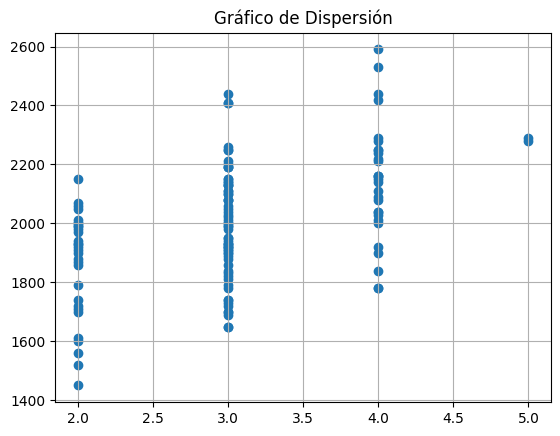

In [25]:
#Aunque vemos dos valores atípicos, decidimos no eliminarlos por ser posibles, pero lo compararemos con 
#cantidad de beedrooms para asegurarnos
import matplotlib.pyplot as plt
plt.scatter(df['Bedrooms'], df['SqFt'])
plt.title('Gráfico de Dispersión')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.show()


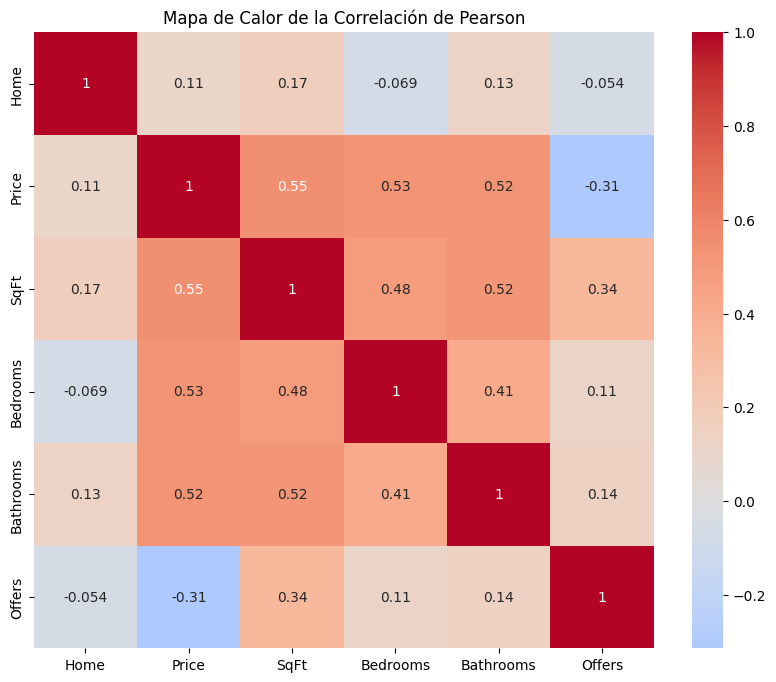

In [26]:
#Queremos ver las correlaciones para ver con qué comparar
import seaborn as sns 
#debo tomar solo los numericos
df_numeric = df.select_dtypes(include = ['int64', 'float64'])
correlation_matrix = df_numeric.corr(method = 'pearson')
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', center = 0)
plt.title('Mapa de Calor de la Correlación de Pearson')
plt.show()

In [27]:
#Vamos a separar las variables predictoras y el objetivo
X = df[['SqFt', 'Bedrooms', 'Bathrooms']]
y = df['Price']

#Dividimos los datos en el conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creamos y entrenamos el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

#Realizamos las predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

#Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'El error cuadrático medio (MSE) es: {mse}')
print(f'R-cuadrado: {r2}')

El error cuadrático medio (MSE) es: 320149938.23026806
R-cuadrado: 0.4568195777548879


In [28]:
#Ahora la predicción para la casa
new_house = [[2000, 3, 2]]
prediction = modelo.predict(new_house)
print(f'La predicción del precio para una nueva casa con las características dadas es: {prediction}')


La predicción del precio para una nueva casa con las características dadas es: [123536.99693218]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

